# LeNet-5

[Gradient-Based Learning Applied to Document Recognition](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)

In [2]:
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import Image

## 데이터 셋 준비

cifar10 데이터셋

In [3]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test)= cifar10.load_data()

In [4]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

fashion_mnist 데이터셋

In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test)= fashion_mnist.load_data()

In [6]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

dimension을 추가하는 2가지 방법

In [7]:
x_train[..., tf.newaxis].shape

(60000, 28, 28, 1)

In [8]:
np.expand_dims(x_train, -1).shape

(60000, 28, 28, 1)

dimension 추가 적용

In [9]:
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [10]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

padding 추가 (28, 28) => (32, 32)

In [11]:
tf.image.resize_with_pad(x_train, 32, 32).shape

TensorShape([60000, 32, 32, 1])

In [12]:
x_train = tf.image.resize_with_pad(x_train, 32, 32)
x_test = tf.image.resize_with_pad(x_test, 32, 32)

In [13]:
x_train.shape, x_test.shape

(TensorShape([60000, 32, 32, 1]), TensorShape([10000, 32, 32, 1]))

## image normalization

In [14]:
x_train = x_train / 255
x_test = x_test / 255

In [15]:
tf.reduce_min(x_train), tf.reduce_max(x_train)

(<tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.0>)

## make one-hot vector

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
to_categorical(y_train)

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
to_categorical(y_train).shape

(60000, 10)

In [19]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [20]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

[Lenet 5 paper](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)

## Lenet 5 Model

In [21]:
Image(url='https://www.researchgate.net/profile/Sheraz_Khan8/publication/321586653/figure/fig4/AS:568546847014912@1512563539828/The-LeNet-5-Architecture-a-convolutional-neural-network.png')

In [22]:
Image(url='https://cdn-images-1.medium.com/max/800/1*gNzz6vvWmF6tDN6pTRTd9g.jpeg')

## Lenet5 Model

In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding="valid", input_shape=(32, 32, 1)),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    tf.keras.layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='tanh'),
    tf.keras.layers.Dense(84, activation='tanh'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [38]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_6 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_7 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_7 (Dense)              (None, 84)               

## Calculate Param

In [41]:
# input filter * (kernel size) * output filter + bias
(5 * 5) * 6 + 6

156

In [42]:
# input filter * (kernel size) * output filter + bias
6 * (5 * 5) * 16 + 16

2416

In [45]:
# input neuron * output neuron + bias
400 * 120 + 120

48120

## Train Model

In [39]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])



1.   156 = (5*5*6) + 6 
2.   2416 = (6*5*5*16) + 16 
3.   48120 = (16*5*5*120) + 120
4.   14520 = (120* 120) + 120
5.   10164 = (120*84) + 84
6.   850 = (84 *10) + 10
 







In [40]:
EPOCHS = 10
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test), 
                    epochs=EPOCHS, 
                   )

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1368 - acc: 0.6164 - val_loss: 0.6193 - val_acc: 0.7670
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5713 - acc: 0.7860 - val_loss: 0.5375 - val_acc: 0.8014
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4906 - acc: 0.8213 - val_loss: 0.4847 - val_acc: 0.8262
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4484 - acc: 0.8378 - val_loss: 0.4595 - val_acc: 0.8369
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4268 - acc: 0.8475 - val_loss: 0.4366 - val_acc: 0.8435
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4026 - acc: 0.8555 - val_loss: 0.4292 - val_acc: 0.8444
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3864 - acc: 0.8600 - val_loss: 0.4080 - val_acc: 0.8546
Epoch 8/10
1875/1875 [==============================] - 4s 2ms

## 시각화

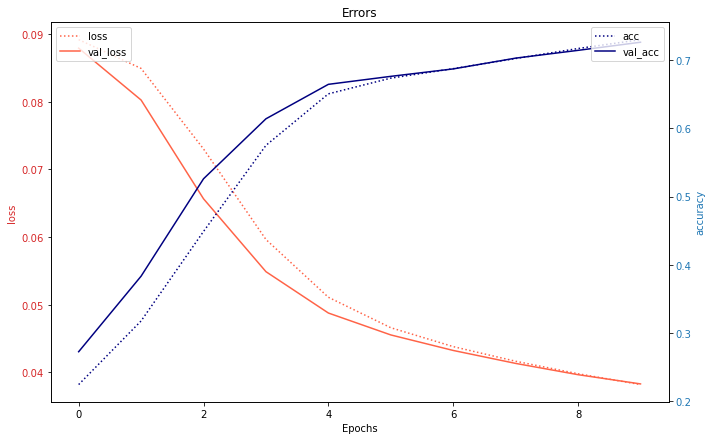

In [27]:
fig, ax1 = plt.subplots()
fig.set_size_inches((10, 6))

color = 'tab:red'
ax1.set_xlabel('Epochs')
ax1.set_ylabel('loss', color=color)
ax1.plot(range(EPOCHS), history.history['loss'], label='loss', linestyle=':', color='tomato')
ax1.plot(range(EPOCHS), history.history['val_loss'], label='val_loss', color='tomato')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')
ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)
ax2.plot(range(EPOCHS), history.history['acc'], label='acc', linestyle=':', color='navy')
ax2.plot(range(EPOCHS), history.history['val_acc'], label='val_acc', color='navy')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')
plt.tight_layout()
plt.title('Errors')
plt.show()